In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

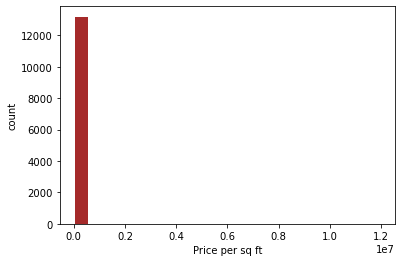

In [36]:
plt.hist(df.price_per_sqft, bins=20, rwidth= 0.8,color= 'brown')
plt.xlabel('Price per sq ft')
plt.ylabel('count')
plt.show()

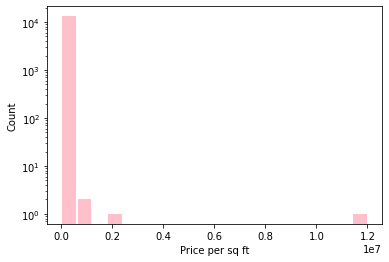

In [12]:
plt.hist(df.price_per_sqft, bins=20, rwidth = 0.9, color = 'pink')
plt.xlabel('Price per sq ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

# Removing outlier using percentile

In [13]:
low_limit, up_limit = df.price_per_sqft.quantile([0.001, 0.999])
low_limit, up_limit

(1366.184, 50959.36200000098)

In [16]:
outlier = df[(df.price_per_sqft>up_limit) | (df.price_per_sqft<low_limit)]
outlier.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
12355,other,4 BHK,16335.0,4.0,149.0,4,912
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
7012,other,1 BHK,650.0,1.0,500.0,1,76923
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729


In [20]:
df1 = df[(df.price_per_sqft<up_limit) & (df.price_per_sqft>low_limit)]
df1.shape

(13172, 7)

In [21]:
df.shape

(13200, 7)

In [22]:
df.shape[0] - df1.shape[0]

28

Total outlier 28

# Removing outlier using standard deviation

In [24]:
min_limit = df1.price_per_sqft.mean() - 4*df1.price_per_sqft.std()
max_limit = df1.price_per_sqft.mean() + 4*df1.price_per_sqft.std()
min_limit, max_limit

(-9900.429065502549, 23227.73653589429)

In [25]:
df1[(df1.price_per_sqft>max_limit) | (df1.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12636,OMBR Layout,5 Bedroom,600.00,3.0,140.0,5,23333
12609,other,6 Bedroom,2295.00,3.0,650.0,6,28322
12095,other,7 Bedroom,2240.00,4.0,700.0,7,31250
11696,other,4 Bedroom,2360.00,4.0,601.0,4,25466
9419,HSR Layout,9 Bedroom,1200.00,9.0,350.0,9,29166
2830,BTM 2nd Stage,4 Bedroom,1500.00,2.0,450.0,4,30000
9907,other,8 Bedroom,600.00,4.0,175.0,8,29166
5639,other,3 BHK,2777.29,5.0,650.0,3,23404
45,HSR Layout,8 Bedroom,600.00,9.0,200.0,8,33333
12799,other,5 Bedroom,1650.00,5.0,450.0,5,27272


In [26]:
df2 = df1[(df1.price_per_sqft<max_limit) & (df1.price_per_sqft>min_limit)]
df2.shape

(13047, 7)

In [27]:
df1.shape[0] - df2.shape[0]

125

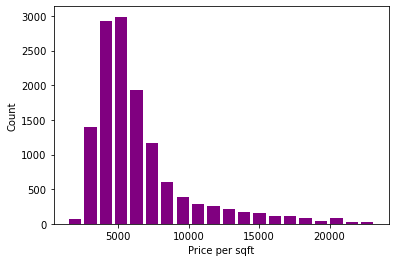

In [29]:
plt.hist(df2.price_per_sqft, bins=20, rwidth = 0.8, color='purple')
plt.xlabel('Price per sqft')
plt.ylabel('Count')
plt.show()